<a href="https://colab.research.google.com/github/Madjogger1202/Team1_AtomicHack2023/blob/main/NH1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 70.6 MB/s eta 0:00:00


In [ ]:
!python -m pip install git+https://github.com/EBjerrum/molvecgen

  Cloning https://github.com/EBjerrum/molvecgen to /tmp/pip-req-build-i184sk2_
  Running command git clone --filter=blob:none --quiet https://github.com/EBjerrum/molvecgen /tmp/pip-req-build-i184sk2_
  Resolved https://github.com/EBjerrum/molvecgen to commit f81d5aade18bea60882f5845877f6283366bbe91
  Preparing metadata (setup.py) ... done
  Created wheel for molvecgen: filename=molvecgen-0.1-py3-none-any.whl size=11357 sha256=eddc283846e1a27788f811f6b8d442a09afd4c37e479ee1cec3fea929dbf6676
  Stored in directory: /tmp/pip-ephem-wheel-cache-tz7uf3sh/wheels/1c/de/14/fd9892b48271e63e56b00c7015c754ae6189e258fa313a7c63
Successfully built molvecgen


In [ ]:
!pip install umap

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3541 sha256=104a7a3bb600353575bd1d8f7afabd6e3838dacab710491027c1659a1f3f52a9
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem, Descriptors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.optim.lr_scheduler import ReduceLROnPlateau
from molvecgen.vectorizers import SmilesVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, d2_absolute_error_score
from sklearn. linear_model import LassoCV
from sklearn. model_selection import RepeatedKFold
import umap
from sklearn.manifold import TSNE
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Chem/1400.xlsx')

In [ ]:
df = df[df.SI <= 100]
df = df[df['IC50, mmg/ml'] < 310]
df = df[df['SMILES'].str.len () < 134]
data = df
data.dropna()
data

,Title,"IC50, mmg/ml","CC50-MDCK, mmg/ml",SI,Molecular weight,Hydrogen bond acceptors,Hydrogen bond donors,Polar SA,SMILES,Pictures
2,1008-Ya-187,9.9,144.0,14.545455,250.431,1,0,15.60,CCN(CC)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,52.0
3,1009-As-106,8.3,500.0,60.240964,222.377,1,0,15.60,CN(C)CC\N=C(\[C@@]12C)C[C@H](C1(C)C)CC2,53.0
4,1010-Ya-208,39.4,143.0,3.629442,239.361,2,0,29.54,CN(C)CC(=O)O[C@H]1C[C@H](CC2)C(C)(C)[C@@]12C,54.0
5,1011-As-83,25.8,500.0,19.379845,265.466,1,0,12.36,CC[N+](C)(CC)CC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,55.0
6,1012-Ya-201,39.4,498.0,12.639594,279.493,1,0,12.36,CC[N+](CC)(CC)CC\N=C(\[C@]12C)C[C@@H](C1(C)C)CC2,56.0
...,...,...,...,...,...,...,...,...,...,...
1459,CHEMBL4288514,300.3,300.3,1.000000,159.187,3,0,38.77,COC(=O)CN1CCOCC1,NaN
1460,CHEMBL4240549,13.2,448.3,34.000000,224.303,3,0,39.44,CC(C)CCCc1c(OC)c(C)c(=O)oc1,NaN
1461,CHEMBL3186705,24.0,330.5,13.800000,154.254,1,1,20.23,C[C@]12C(C)(C)[C@@H](CC2)C[C@H]1O,NaN
1462,CHEMBL4248255,16.7,492.7,29.600000,224.303,3,1,50.44,CCCCCCCc1c(O)c(C)c(=O)oc1,NaN


In [ ]:
lable = data['SMILES'][100:108].astype(str) + '\nSI = '+ data['SI'][100:108].astype(str)
mol_list = [Chem.MolFromSmiles(s) for s in data['SMILES'][100:108]]
def mol_dsc_calc(mols):
    return pd.DataFrame({k: f(Chem.MolFromSmiles(m)) for k, f in descriptors.items()} for m in mols)

# ++список конституционных и физико-химических дескрипторов из библиотеки RDKit
descriptors = {"HeavyAtomCount": Descriptors.HeavyAtomCount,
               "NHOHCount": Descriptors.NHOHCount,
               "NOCount": Descriptors.NOCount,
               "NumHAcceptors": Descriptors.NumHAcceptors,
               "NumHDonors": Descriptors.NumHDonors,
               "NumHeteroatoms": Descriptors.NumHeteroatoms,
               "NumRotatableBonds": Descriptors.NumRotatableBonds,
               "NumValenceElectrons": Descriptors.NumValenceElectrons,
               "NumAromaticRings": Descriptors.NumAromaticRings,
               "NumAliphaticHeterocycles": Descriptors.NumAliphaticHeterocycles,
               "RingCount": Descriptors.RingCount,
               "MW": Descriptors.MolWt,
               "LogP": Descriptors.MolLogP,
               "MR": Descriptors.MolMR,
               "TPSA": Descriptors.TPSA,

               "MaxEStateIndex": Descriptors.MaxEStateIndex,
               "MinEStateIndex": Descriptors.MinEStateIndex,
               "MaxAbsEStateIndex": Descriptors.MaxAbsEStateIndex,
               "MinAbsEStateIndex": Descriptors.MinAbsEStateIndex,
               "qed": Descriptors.qed,
               "MolWt": Descriptors.MolWt,
               "HeavyAtomMolWt": Descriptors.HeavyAtomMolWt,
               "ExactMolWt": Descriptors.ExactMolWt,
               "MaxPartialCharge": Descriptors.MaxPartialCharge,
               "MinPartialCharge": Descriptors.MinPartialCharge,
               "MaxAbsPartialCharge": Descriptors.MaxAbsPartialCharge,
               "MinAbsPartialCharge": Descriptors.MinAbsPartialCharge,
               "FpDensityMorgan1": Descriptors.FpDensityMorgan1,
               "FpDensityMorgan2": Descriptors.FpDensityMorgan2,
               "FpDensityMorgan3": Descriptors.FpDensityMorgan3,
               "BCUT2D_MWHI": Descriptors.BCUT2D_MWHI,
               "BCUT2D_MWLOW": Descriptors.BCUT2D_MWLOW,
               "BCUT2D_CHGHI": Descriptors.BCUT2D_CHGHI,
               "BCUT2D_CHGLO": Descriptors.BCUT2D_CHGLO,
               "BCUT2D_LOGPHI": Descriptors.BCUT2D_LOGPHI,
               "BCUT2D_LOGPLOW": Descriptors.BCUT2D_LOGPLOW,
               "BCUT2D_MRHI": Descriptors.BCUT2D_MRHI,
               "BCUT2D_MRLOW": Descriptors.BCUT2D_MRLOW,
               "BalabanJ": Descriptors.BalabanJ,
               "BertzCT": Descriptors.BertzCT,
               "Chi0": Descriptors.Chi0,
               "Chi0n": Descriptors.Chi0n,
               "Chi0v": Descriptors.Chi0v,
               "Chi1": Descriptors.Chi1,
               "Chi1n": Descriptors.Chi1n,
               "Chi1v": Descriptors.Chi1v,
               #"Chi2": Descriptors.Chi2,
               "Chi2n": Descriptors.Chi2n,
               "Chi2v": Descriptors.Chi2v,
               #"Chi3": Descriptors.Chi3,
               "Chi3n": Descriptors.Chi3n,
               "Chi3v": Descriptors.Chi3v,
               #"Chi4": Descriptors.Chi4,
               "Chi4n": Descriptors.Chi4n,
               "Chi4v": Descriptors.Chi4v,
               "HallKierAlpha": Descriptors.HallKierAlpha,
               "Ipc": Descriptors.Ipc,
               "Kappa1": Descriptors.Kappa1,
               "Kappa2": Descriptors.Kappa2,
               "Kappa3": Descriptors.Kappa3,
               "LabuteASA": Descriptors.LabuteASA,
               "PEOE_VSA1": Descriptors.PEOE_VSA1,
               "PEOE_VSA10": Descriptors.PEOE_VSA10,
               "PEOE_VSA11": Descriptors.PEOE_VSA11,
               "PEOE_VSA12": Descriptors.PEOE_VSA12,
               "PEOE_VSA13": Descriptors.PEOE_VSA13,
               "PEOE_VSA14": Descriptors.PEOE_VSA14,
               "PEOE_VSA2": Descriptors.PEOE_VSA2,
               "PEOE_VSA3": Descriptors.PEOE_VSA3,
               "PEOE_VSA4": Descriptors.PEOE_VSA4,
               "PEOE_VSA5": Descriptors.PEOE_VSA5,
               "PEOE_VSA6": Descriptors.PEOE_VSA6,
               "PEOE_VSA7": Descriptors.PEOE_VSA7,
               "PEOE_VSA8": Descriptors.PEOE_VSA8,
               "PEOE_VSA9": Descriptors.PEOE_VSA9,
               "SMR_VSA1": Descriptors.SMR_VSA1,
               "SMR_VSA10": Descriptors.SMR_VSA10,
               "SMR_VSA2": Descriptors.SMR_VSA2,
               "SMR_VSA3": Descriptors.SMR_VSA3,
               "SMR_VSA4": Descriptors.SMR_VSA4,
               "SMR_VSA5": Descriptors.SMR_VSA5,
               "SMR_VSA6": Descriptors.SMR_VSA6,
               "SMR_VSA7": Descriptors.SMR_VSA7,
               "SMR_VSA8": Descriptors.SMR_VSA8,
               "SMR_VSA9": Descriptors.SMR_VSA9,
               "SlogP_VSA1": Descriptors.SlogP_VSA1,
               "SlogP_VSA10": Descriptors.SlogP_VSA10,
               "SlogP_VSA11": Descriptors.SlogP_VSA11,
               "SlogP_VSA12": Descriptors.SlogP_VSA12,
               "SlogP_VSA2": Descriptors.SlogP_VSA2,
               "SlogP_VSA3": Descriptors.SlogP_VSA3,
               "SlogP_VSA4": Descriptors.SlogP_VSA4,
               "SlogP_VSA5": Descriptors.SlogP_VSA5,
               "SlogP_VSA6": Descriptors.SlogP_VSA6,
               "SlogP_VSA7": Descriptors.SlogP_VSA7,
               "SlogP_VSA8": Descriptors.SlogP_VSA8,
               "SlogP_VSA9": Descriptors.SlogP_VSA9,
               "EState_VSA1": Descriptors.EState_VSA1,
               "EState_VSA10": Descriptors.EState_VSA10,
               "EState_VSA11": Descriptors.EState_VSA11,
               "EState_VSA2": Descriptors.EState_VSA2,
               "EState_VSA3": Descriptors.EState_VSA3,
               "EState_VSA4": Descriptors.EState_VSA4,
               "EState_VSA5": Descriptors.EState_VSA5,
               "EState_VSA6": Descriptors.EState_VSA6,
               "EState_VSA7": Descriptors.EState_VSA7,
               "EState_VSA8": Descriptors.EState_VSA8,
               "EState_VSA9": Descriptors.EState_VSA9,
               "VSA_EState1": Descriptors.VSA_EState1,
               "VSA_EState10": Descriptors.VSA_EState10,
               "VSA_EState2": Descriptors.VSA_EState2,
               "VSA_EState3": Descriptors.VSA_EState3,
               "VSA_EState4": Descriptors.VSA_EState4,
               "VSA_EState5": Descriptors.VSA_EState5,
               "VSA_EState6": Descriptors.VSA_EState6,
               "VSA_EState7": Descriptors.VSA_EState7,
               "VSA_EState8": Descriptors.VSA_EState8,
               "VSA_EState9": Descriptors.VSA_EState9,
               "FractionCSP3": Descriptors.FractionCSP3,
               "fr_Al_COO": Descriptors.fr_Al_COO,
               "fr_Al_OH": Descriptors.fr_Al_OH,
               "fr_Al_OH_noTert": Descriptors.fr_Al_OH_noTert,
               "fr_ArN": Descriptors.fr_ArN,
               "fr_Ar_COO": Descriptors.fr_Ar_COO,
               "fr_Ar_N": Descriptors.fr_Ar_N,
               "fr_Ar_NH": Descriptors.fr_Ar_NH,
               "fr_Ar_OH": Descriptors.fr_Ar_OH,
               "fr_COO": Descriptors.fr_COO,
               "fr_COO2": Descriptors.fr_COO2,
               "fr_C_O": Descriptors.fr_C_O,
               "fr_C_O_noCOO": Descriptors.fr_C_O_noCOO,
               "fr_C_S": Descriptors.fr_C_S,
               "fr_HOCCN": Descriptors.fr_HOCCN,
               "fr_Imine": Descriptors.fr_Imine,
               "fr_NH0": Descriptors.fr_NH0,
               "fr_NH1": Descriptors.fr_NH1,
               "fr_NH2": Descriptors.fr_NH2,
               "fr_N_O": Descriptors.fr_N_O,
               "fr_Ndealkylation1": Descriptors.fr_Ndealkylation1,
               "fr_Ndealkylation2": Descriptors.fr_Ndealkylation2,
               "fr_Nhpyrrole": Descriptors.fr_Nhpyrrole,
               "fr_SH": Descriptors.fr_SH,
               "fr_aldehyde": Descriptors.fr_aldehyde,
               "fr_alkyl_carbamate": Descriptors.fr_alkyl_carbamate,
               "fr_alkyl_halide": Descriptors.fr_alkyl_halide,
               "fr_allylic_oxid": Descriptors.fr_allylic_oxid,
               "fr_amide": Descriptors.fr_amide,
               "fr_amidine": Descriptors.fr_amidine,
               "fr_aniline": Descriptors.fr_aniline,
               "fr_aryl_methyl": Descriptors.fr_aryl_methyl,
               "fr_azide": Descriptors.fr_azide,
               "fr_azo": Descriptors.fr_azo,
               "fr_barbitur": Descriptors.fr_barbitur,
               "fr_benzene": Descriptors.fr_benzene,
               "fr_benzodiazepine": Descriptors.fr_benzodiazepine,
               "fr_bicyclic": Descriptors.fr_bicyclic,
               "fr_diazo": Descriptors.fr_diazo,
               "fr_dihydropyridine": Descriptors.fr_dihydropyridine,
               "fr_epoxide": Descriptors.fr_epoxide,
               "fr_ester": Descriptors.fr_ester,
               "fr_ether": Descriptors.fr_ether,
               "fr_furan": Descriptors.fr_furan,
               "fr_guanido": Descriptors.fr_guanido,
               "fr_halogen": Descriptors.fr_halogen,
               "fr_hdrzine": Descriptors.fr_hdrzine,
               "fr_hdrzone": Descriptors.fr_hdrzone,
               "fr_imidazole": Descriptors.fr_imidazole,
               "fr_imide": Descriptors.fr_imide,
               "fr_isocyan": Descriptors.fr_isocyan,
               "fr_isothiocyan": Descriptors.fr_isothiocyan,
               "fr_ketone": Descriptors.fr_ketone,
               "fr_ketone_Topliss": Descriptors.fr_ketone_Topliss,
               "fr_lactam": Descriptors.fr_lactam,
               "fr_lactone": Descriptors.fr_lactone,
               "fr_methoxy": Descriptors.fr_methoxy,
               "fr_morpholine": Descriptors.fr_morpholine,
               "fr_nitrile": Descriptors.fr_nitrile,
               "fr_nitro": Descriptors.fr_nitro,
               "fr_nitro_arom": Descriptors.fr_nitro_arom,
               "fr_nitro_arom_nonortho": Descriptors.fr_nitro_arom_nonortho,
               "fr_nitroso": Descriptors.fr_nitroso,
               "fr_oxazole": Descriptors.fr_oxazole,
               "fr_oxime": Descriptors.fr_oxime,
               "fr_para_hydroxylation": Descriptors.fr_para_hydroxylation,
               "fr_phenol": Descriptors.fr_phenol,
               "fr_phenol_noOrthoHbond": Descriptors.fr_phenol_noOrthoHbond,
               "fr_phos_acid": Descriptors.fr_phos_acid,
               "fr_phos_ester": Descriptors.fr_phos_ester,
               "fr_piperdine": Descriptors.fr_piperdine,
               "fr_piperzine": Descriptors.fr_piperzine,
               "fr_priamide": Descriptors.fr_priamide,
               "fr_prisulfonamd": Descriptors.fr_prisulfonamd,
               "fr_pyridine": Descriptors.fr_pyridine,
               "fr_quatN": Descriptors.fr_quatN,
               "fr_sulfide": Descriptors.fr_sulfide,
               "fr_sulfonamd": Descriptors.fr_sulfonamd,
               #"fr_sulfone": Descriptors.fr_sulfone,
               "fr_term_acetylene": Descriptors.fr_term_acetylene,
               "fr_tetrazole": Descriptors.fr_tetrazole,
               "fr_thiazole": Descriptors.fr_thiazole,
               #"fr_thiocyan": Descriptors.fr_thiocyan,
               "fr_thiophene": Descriptors.fr_thiophene,
               "fr_unbrch_alkane": Descriptors.fr_unbrch_alkane,
               "fr_urea": Descriptors.fr_urea
               }
# sklearn трансформер для использования в конвейерном моделировании
descriptors_transformer = FunctionTransformer(mol_dsc_calc)
X = descriptors_transformer.transform(data['SMILES'])

In [ ]:
#x = data.iloc[:, 4:7]
#X = pd.concat([x, X], axis=1)
X = X.dropna()
pca = PCA(n_components=10)
ts = TSNE(n_components=32)
x = pca.fit_transform(X)

In [ ]:
y = data.iloc[0:1206, 3].values.reshape((-1,1))
y.shape

(1206, 1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train,  test_size=0.2, random_state=33)
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
y_valid = scaler.transform(y_valid)
type(y_train)

numpy.ndarray

In [ ]:
logreg = LinearRegression()
logreg.fit(x_train, y_train)
#for i in range(302):
#   print(logreg.predict(x_test)[i], "    ", y_test[i])
print(r2_score(logreg.predict(x_test), y_test))

-24.468398604470142


In [ ]:
cv = RepeatedKFold(n_splits=7 , n_repeats= 3 , random_state= 1 )
model = LassoCV(alphas= (0.0, 1.0, 0.5), cv=cv, n_jobs=-1)
model.fit(x_train, y_train)
print(r2_score(model.predict(x_test), y_test))

-50.05682693632969


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309.93046934218154, tolerance: 0.06426402849446904
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L

In [ ]:
params = {
    "n_estimators": 300,
    "max_depth": 44,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(x_train, y_train)

mse = mean_squared_error(y_test, reg.predict(x_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The mean squared error (MSE) on test set: 1.2326


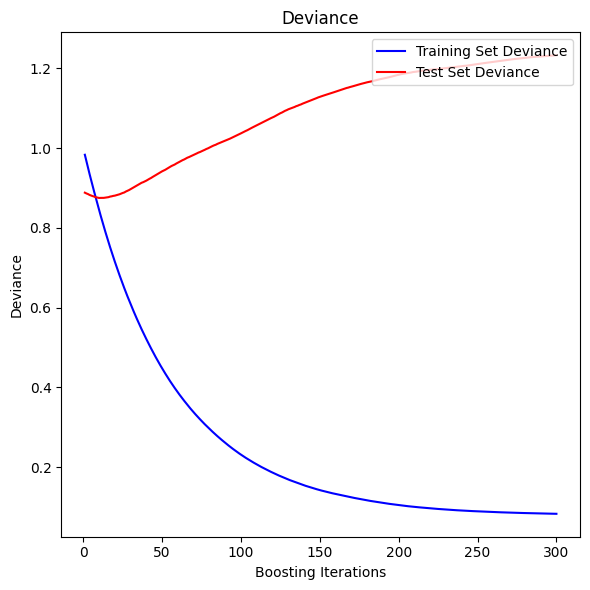

In [ ]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(x_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [ ]:
df_w = df[[ 'IC50, mmg/ml', 'SMILES']]

In [ ]:
PandasTools.AddMoleculeColumnToFrame(df_w,'SMILES','Molecule')
df_w[["SMILES","Molecule"]]
smivec = SmilesVectorizer(pad=1, leftpad=True, canonical=False, augment=True)
smivec.fit(df_w.Molecule.values, )
train_dataset = SMILESMolDataset(x_train, y_train, smivec)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

/usr/local/lib/python3.10/dist-packages/rdkit/Chem/PandasTools.py:371: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame[molCol] = frame[smilesCol].map(Chem.MolFromSmiles)


cpu


In [ ]:
X = df_w.Molecule.values
X = X[0:1206]
X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size=0.25, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train,  test_size=0.2, random_state=42)
#Normalizing output using standard scaling
scaler = StandardScaler()
y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)
y_validation = scaler.transform(y_validation)

array([<rdkit.Chem.rdchem.Mol object at 0x79ab8a565310>,
       <rdkit.Chem.rdchem.Mol object at 0x79ab8a565000>, ...,
       <rdkit.Chem.rdchem.Mol object at 0x79ab8a5bdf50>], dtype=object)

In [ ]:
X_validation_t = smivec.transform(X_validation, canonical=False)
X_validation_t = torch.tensor(X_validation_t, device=device).float()
y_validation_t = torch.tensor(y_valid, device=device).float()
y_validation_t = torch.nan_to_num(y_validation_t, nan = torch.nanmean(y_validation_t))
X_validation_t.shape

torch.Size([181, 130, 40])